## Bank Churners

Number of entries: 10127
Number of features: 5


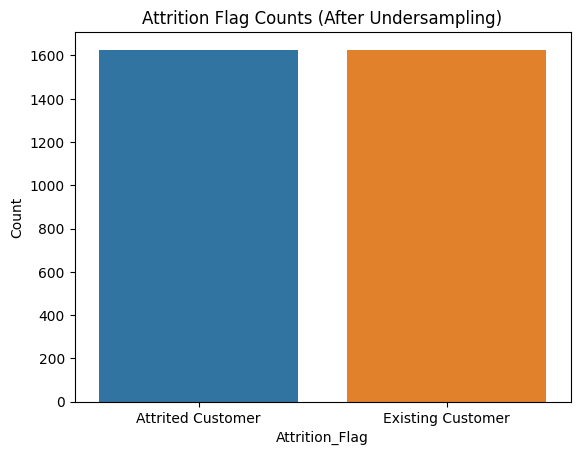

Attrition_Flag
Attrited Customer    1627
Existing Customer    1627
Name: count, dtype: int64


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import constants
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from graphs import plot_learning_curve
import time
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load the dataset
data = pd.read_csv('./datasets/BankChurners.csv')

# Define the target column and set random_state
target_column = 'Attrition_Flag'

# List of categorical columns to keep
columns_to_keep = ["Customer_Age", "Gender", "Education_Level", "Marital_Status", "Income_Category"]

# Drop all other categorical columns
X = data[columns_to_keep]
y = data[target_column]

num_entries = data.shape[0]
print("Number of entries:", num_entries)
num_features = X.shape[1]
print("Number of features:", num_features)

# Encode categorical features using one-hot encoding
categorical_cols = ["Gender", "Education_Level", "Marital_Status", "Income_Category"]
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Perform undersampling
undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=constants.CV)
X_resampled, y_resampled = undersampler.fit_resample(X_encoded, y)

sns.countplot(data=pd.DataFrame({'Attrition_Flag': y_resampled}), x='Attrition_Flag')
plt.xlabel('Attrition_Flag')
plt.ylabel('Count')
plt.title('Attrition Flag Counts (After Undersampling)')
plt.show()

counts = pd.Series(y_resampled).value_counts()

# Now 'counts' contains the counts of each category ('Existing Customer' and 'Attrited Customer')
print(counts)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=constants.TEST_SIZE, random_state=constants.RANDOM_STATE)


Run Scaling for the data to be used in the SVM, NN, and kNN. These are algorithms which always benefit from scaling the data.

In [3]:
from sklearn.preprocessing import StandardScaler

# We need to scale the data before we pass it to the SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Decision Trees

In [26]:
from dt import dt

param_grid = {
    'max_depth': [1,2,4,3,7], 
    'min_samples_split': [2,3,4,5,10,15,20],
    'min_samples_leaf': [1]
}

best_dt_model, best_dt_params = dt(X_train, X_test, y_train, y_test, param_grid)

Decision Tree took 0.0015599727630615234 seconds to train.
Decision Tree took 0.0007200241088867188 seconds to execute.

Decision tree train report
                    precision    recall  f1-score   support

Attrited Customer   0.518544  0.579812  0.547470      1278
Existing Customer   0.542589  0.480755  0.509804      1325

         accuracy                       0.529389      2603
        macro avg   0.530567  0.530283  0.528637      2603
     weighted avg   0.530784  0.529389  0.528297      2603


Decision tree test report
                    precision    recall  f1-score   support

Attrited Customer   0.551020  0.541547  0.546243       349
Existing Customer   0.480519  0.490066  0.485246       302

         accuracy                       0.517665       651
        macro avg   0.515770  0.515807  0.515744       651
     weighted avg   0.518315  0.517665  0.517946       651

Best Hyperparameters: {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
Tree Size: 3
Number of 

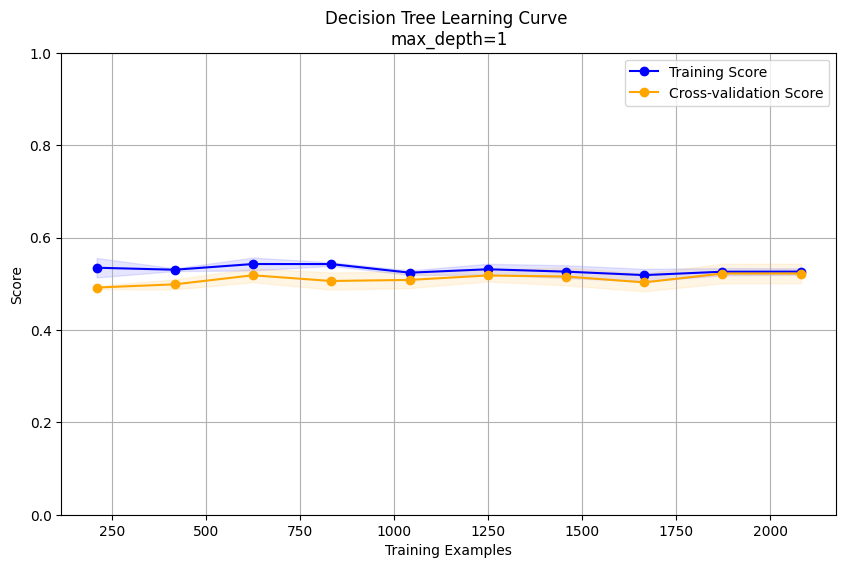

In [27]:
title="max_depth=1"
plot_learning_curve(best_dt_model, X_train, y_train, scoring='accuracy', title=f"Decision Tree Learning Curve \n{title}")

### Neural Networks

In [4]:
from nn import nn

param_grid = {
    'hidden_layer_sizes': [(256, 256)],
    'learning_rate_init': [0.01],
    'alpha': [0.0001], # L2 penalty (regularization term) parameter
}
best_nn_model, best_nn_params = nn(X_train_scaled, X_test_scaled, y_train, y_test, param_grid)

Best Hyperparameters: {'alpha': 0.0001, 'hidden_layer_sizes': (512, 256), 'learning_rate_init': 0.01}

NN train report
                    precision    recall  f1-score   support

Attrited Customer   0.566612  0.539124  0.552526      1278
Existing Customer   0.575342  0.602264  0.588496      1325

         accuracy                       0.571264      2603
        macro avg   0.570977  0.570694  0.570511      2603
     weighted avg   0.571056  0.571264  0.570836      2603


NN test report
                    precision    recall  f1-score   support

Attrited Customer   0.574675  0.507163  0.538813       349
Existing Customer   0.498542  0.566225  0.530233       302

         accuracy                       0.534562       651
        macro avg   0.536609  0.536694  0.534523       651
     weighted avg   0.539357  0.534562  0.534832       651

NN took 0.007232189178466797 seconds to execute.


In [7]:

title="learning rate=0.1 layers=512"
plot_learning_curve(best_nn_model, X_train_scaled, y_train, scoring='accuracy', title=f"Bank Churners Decision Tree Learning Curve\n{title}")



--------------------------------------------------------------------------------
LokyProcess-22 failed with traceback: 
--------------------------------------------------------------------------------
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 176, in <module>
    process_obj = pickle.load(from_parent)
                  ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: Can't get attribute 'ArrayMemmapReducer' on <module 'joblib._memmapping_reducer' from '/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/joblib/_memmapping_reducer.py'>


--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
LokyProcess-29 failed with traceback: 
--------------------------------------------------------------------------------


-----------

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {EXIT(1), EXIT(1)}

### K-Nearest Neighbors

In [34]:
from knn import knn

param_grid = {
    'n_neighbors': [90],
    'weights': ['distance'],
    'p': [2]
}

best_knn_model, best_knn_params = knn(X_train_scaled, X_test_scaled, y_train, y_test, param_grid)

Best Hyperparameters: {'n_neighbors': 90, 'p': 2, 'weights': 'distance'}

knn train report
                    precision    recall  f1-score   support

Attrited Customer   0.815864  0.901408  0.856506      1278
Existing Customer   0.894207  0.803774  0.846582      1325

         accuracy                       0.851710      2603
        macro avg   0.855035  0.852591  0.851544      2603
     weighted avg   0.855743  0.851710  0.851454      2603


knn test report
                    precision    recall  f1-score   support

Attrited Customer   0.553797  0.501433  0.526316       349
Existing Customer   0.480597  0.533113  0.505495       302

         accuracy                       0.516129       651
        macro avg   0.517197  0.517273  0.515905       651
     weighted avg   0.519840  0.516129  0.516657       651

K-NN took 0.014682769775390625 seconds to execute.


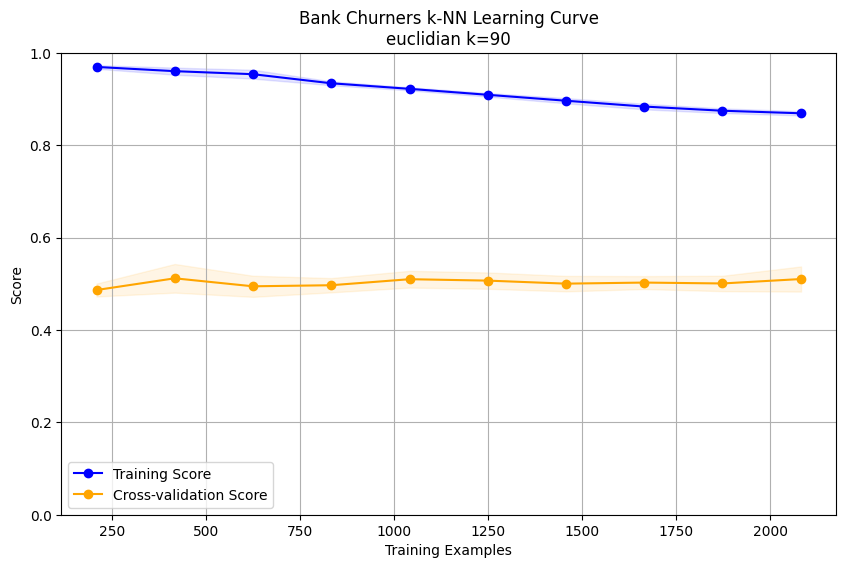

In [35]:
title="euclidian k=90"
plot_learning_curve(best_knn_model, X_train, y_train, scoring='accuracy', title=f"Bank Churners k-NN Learning Curve\n{title}")

### Boosted Decision Tree Classifier

In [53]:
from dt import ada_boosted_dt

# Define the parameter grid for AdaBoost
param_grid = {
    'base_estimator__max_depth': [None],  # Adjust max_depth as needed
    'n_estimators': [50],  # Number of Decision Trees in the ensemble
    'learning_rate': [0.1]
}

best_bdt_model, best_bdt_params = ada_boosted_dt(X_train, X_test, y_train, y_test, param_grid)


Best AdaBoost Decision Tree Hyperparameters: {'base_estimator__max_depth': None, 'learning_rate': 0.1, 'n_estimators': 50}

NN train report
                    precision    recall  f1-score   support

Attrited Customer   0.802168  0.926448  0.859840      1278
Existing Customer   0.916593  0.779623  0.842577      1325

         accuracy                       0.851710      2603
        macro avg   0.859380  0.853035  0.851209      2603
     weighted avg   0.860413  0.851710  0.851053      2603


NN test report
                    precision    recall  f1-score   support

Attrited Customer   0.550152  0.518625  0.533923       349
Existing Customer   0.478261  0.509934  0.493590       302

         accuracy                       0.514593       651
        macro avg   0.514206  0.514279  0.513757       651
     weighted avg   0.516802  0.514593  0.515212       651

DTADA Boosting took 0.006714820861816406 seconds to execute.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/

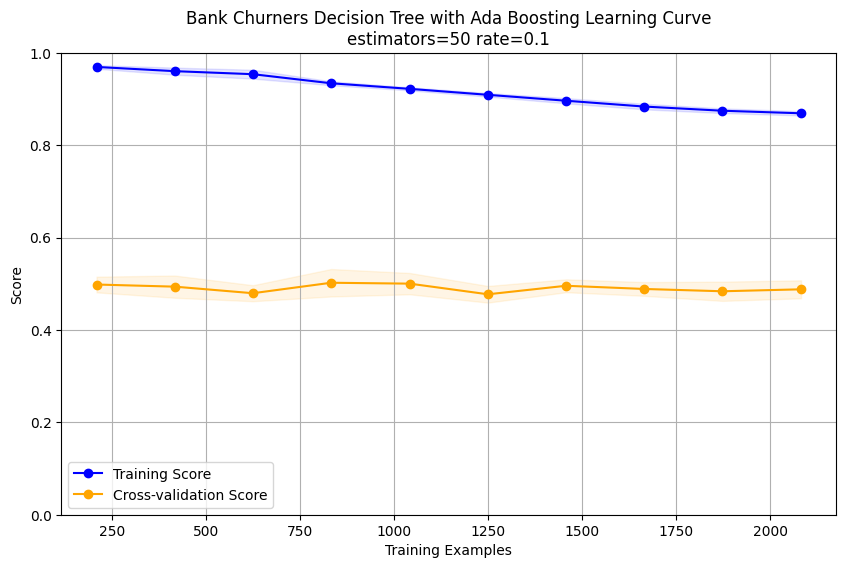

In [52]:
title="unprune"
plot_learning_curve(best_bdt_model, X_train, y_train, scoring='accuracy', title=f"Bank Churners Decision Tree with Ada Boosting Learning Curve\n{title}")

### Support Vector Machine


In [16]:
from svm import svm

# Set the param grid
param_grid = {
    'C': [10, 0.1],
    'kernel': ['rbf'],
    'gamma': [0.1],
}

# Pass the scaled data to the svm
best_svm_model, best_svm_params = svm(X_train_scaled, X_test_scaled, y_train, y_test, param_grid)


Best Hyperparameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
SVM Boosting took 0.02102208137512207 seconds to execute.
SVM Boosting took 0.0324549674987793 seconds to train.

SVM train report
                    precision    recall  f1-score   support

Attrited Customer   0.787879  0.056769  0.105906       458
Existing Customer   0.553257  0.987085  0.709079       542

         accuracy                       0.561000      1000
        macro avg   0.670568  0.521927  0.407493      1000
     weighted avg   0.660714  0.561000  0.432826      1000


SVM test report
                    precision    recall  f1-score   support

Attrited Customer   0.527778  0.054441  0.098701       349
Existing Customer   0.463415  0.943709  0.621592       302

         accuracy                       0.466974       651
        macro avg   0.495596  0.499075  0.360147       651
     weighted avg   0.497920  0.466974  0.341271       651



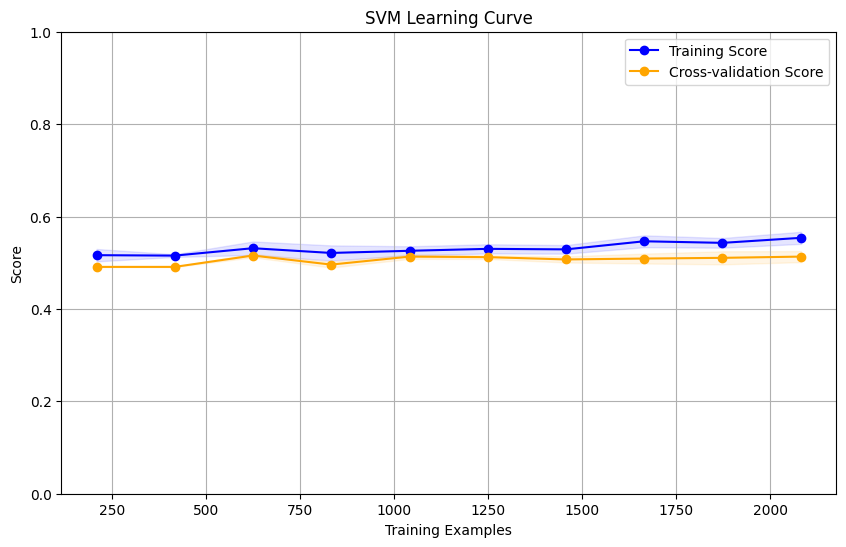

In [17]:
plot_learning_curve(best_svm_model, X_train_scaled, y_train, scoring='accuracy', title=f"Bank Churners SVM Learning Curve\n{title}")